In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Saving and loading models

 ## Coding tutorials
 #### [1. Saving and loading model weights](#coding_tutorial_1)
 #### [2. Model saving criteria](#coding_tutorial_2)
 #### [3. Saving the entire model](#coding_tutorial_3)
 #### [4. Loading pre-trained Keras models](#coding_tutorial_4)
 #### [5. Tensorflow Hub modules](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Saving and loading model weights

#### Load and inspect CIFAR-10 dataset

The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

170500096/170498071 [==============================] - 2s 0us/step


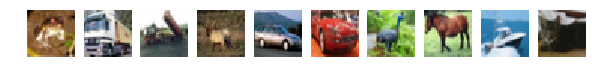

In [3]:
# Plot the first 10 CIFAR-10 images
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

#### Introduce two useful functions

In [4]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [5]:
# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Create simple convolutional neural network classifier

In [6]:
# Create an instance of the model and show model summary
model = get_new_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [7]:
# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model,x_test,y_test)

accuracy: 0.121


#### Train model with checkpoints

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
# Create Tensorflow checkpoint object
checkpoint_path = 'model/checkpoint'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            verbose=1)

In [10]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch

history = model.fit(x_train,y_train,callbacks=[checkpoint],epochs=3)

Train on 10000 samples
Epoch 1/3
 9984/10000 [============================>.] - ETA: 0s - loss: 2.0332 - accuracy: 0.2559
Epoch 00001: saving model to model/checkpoint
10000/10000 [==============================] - 50s 5ms/sample - loss: 2.0328 - accuracy: 0.2563
Epoch 2/3
 9984/10000 [============================>.] - ETA: 0s - loss: 1.6937 - accuracy: 0.3867
Epoch 00002: saving model to model/checkpoint
10000/10000 [==============================] - 46s 5ms/sample - loss: 1.6936 - accuracy: 0.3866
Epoch 3/3
 9984/10000 [============================>.] - ETA: 0s - loss: 1.5537 - accuracy: 0.4354
Epoch 00003: saving model to model/checkpoint
10000/10000 [==============================] - 45s 4ms/sample - loss: 1.5533 - accuracy: 0.4354


In [16]:
# Have a look at what the checkpoint creates

! ls -lh model

ls: cannot access 'model': No such file or directory


In [12]:
# Evaluate the performance of the trained model

get_test_accuracy(model,x_test,y_test)

accuracy: 0.443


#### Create new model, load weights

In [13]:
# Create a new instance of the (initialised) model, accuracy around 10% again

model = get_new_model()
get_test_accuracy(model,x_test,y_test)

accuracy: 0.106


In [14]:
# Load weights -- accuracy is the same as the trained model

model.load_weights(checkpoint_path)
get_test_accuracy(model,x_test,y_test)

accuracy: 0.443


#### Clear directory

In [15]:
! rm -r model

***
<a id="coding_tutorial_2"></a>
## Model saving criteria

#### Create more customised checkpoint

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
# Create Tensorflow checkpoint object with epoch and batch details
checkpoint_path = 'model1/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_weights_only=True,
                            save_freq=5000,
                            verbose=1)

In [25]:
# Create and fit model with checkpoint
model = get_new_model()
history = model.fit(x_train,y_train,callbacks=[checkpoint],epochs=3,validation_split=0.10)

Train on 10000 samples
Epoch 1/3
 4992/10000 [=============>................] - ETA: 25s - loss: 2.1879 - accuracy: 0.1633
Epoch 00001: saving model to model1/checkpoint_01_0156
10000/10000 [==============================] - 47s 5ms/sample - loss: 2.0456 - accuracy: 0.2325
Epoch 2/3

Epoch 00002: saving model to model1/checkpoint_02_0000
 5024/10000 [==============>...............] - ETA: 25s - loss: 1.7152 - accuracy: 0.3762
Epoch 00002: saving model to model1/checkpoint_02_0157
10000/10000 [==============================] - 48s 5ms/sample - loss: 1.6595 - accuracy: 0.3942
Epoch 3/3
   32/10000 [..............................] - ETA: 31s - loss: 1.3584 - accuracy: 0.5938
Epoch 00003: saving model to model1/checkpoint_03_0001
 5056/10000 [==============>...............] - ETA: 21s - loss: 1.5164 - accuracy: 0.4496
Epoch 00003: saving model to model1/checkpoint_03_0158
10000/10000 [==============================] - 44s 4ms/sample - loss: 1.5003 - accuracy: 0.4552


In [26]:
# Have a look at what the checkpoint creates

! ls -lh model1

total 904K
-rw-r--r-- 1 jovyan users   93 Apr 24 13:28 checkpoint
-rw-r--r-- 1 jovyan users 174K Apr 24 13:26 checkpoint_01_0156.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:26 checkpoint_01_0156.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:26 checkpoint_02_0000.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:26 checkpoint_02_0000.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:27 checkpoint_02_0157.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:27 checkpoint_02_0157.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:27 checkpoint_03_0001.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:27 checkpoint_03_0001.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:28 checkpoint_03_0158.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:28 checkpoint_03_0158.index


#### Work with model saving criteria

In [27]:
# Use tiny training and test set -- will overfit!

x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [38]:
# Create a new instance of untrained model

model = get_new_model()

In [39]:
# Create Tensorflow checkpoint object which monitors the validation accuracy
checkpoint_path = 'model2/checkpoint_{epoch:02d}'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_weights_only=True,
                            monitor='val_accuracy',
                             save_best_only=True,
                            verbose=1)


In [40]:
# Fit the model and save only the weights with the highest validation accuracy

# Create and fit model with checkpoint
#model = get_new_model()
history = model.fit(x_train,y_train,callbacks=[checkpoint],epochs=30,validation_split=0.10,batch_size=10)

Train on 90 samples, validate on 10 samples
Epoch 1/30
80/90 [=========================>....] - ETA: 0s - loss: 2.2956 - accuracy: 0.1500
Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to model2/checkpoint_01
90/90 [==============================] - 2s 17ms/sample - loss: 2.3078 - accuracy: 0.1444 - val_loss: 2.2696 - val_accuracy: 0.1000
Epoch 2/30
80/90 [=========================>....] - ETA: 0s - loss: 2.2558 - accuracy: 0.1625
Epoch 00002: val_accuracy did not improve from 0.10000
90/90 [==============================] - 1s 7ms/sample - loss: 2.2642 - accuracy: 0.1444 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 3/30
70/90 [======================>.......] - ETA: 0s - loss: 2.2411 - accuracy: 0.1429
Epoch 00003: val_accuracy did not improve from 0.10000
90/90 [==============================] - 1s 8ms/sample - loss: 2.2355 - accuracy: 0.1667 - val_loss: 2.3219 - val_accuracy: 0.1000
Epoch 4/30
70/90 [======================>.......] - ETA: 0s - loss: 2.2221 -

80/90 [=========================>....] - ETA: 0s - loss: 0.4565 - accuracy: 0.9000
Epoch 00029: val_accuracy did not improve from 0.40000
90/90 [==============================] - 1s 7ms/sample - loss: 0.4500 - accuracy: 0.9000 - val_loss: 2.0147 - val_accuracy: 0.4000
Epoch 30/30
80/90 [=========================>....] - ETA: 0s - loss: 0.4123 - accuracy: 0.9375
Epoch 00030: val_accuracy did not improve from 0.40000
90/90 [==============================] - 1s 7ms/sample - loss: 0.4423 - accuracy: 0.9222 - val_loss: 2.1839 - val_accuracy: 0.4000


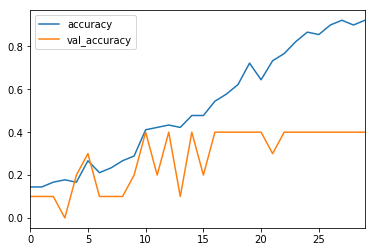

In [41]:
# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [42]:
# Inspect the checkpoint directory

! ls -lh model2

total 724K
-rw-r--r-- 1 jovyan users   83 Apr 24 13:32 checkpoint
-rw-r--r-- 1 jovyan users 174K Apr 24 13:32 checkpoint_01.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:32 checkpoint_01.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:32 checkpoint_05.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:32 checkpoint_05.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:32 checkpoint_06.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:32 checkpoint_06.index
-rw-r--r-- 1 jovyan users 174K Apr 24 13:32 checkpoint_11.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.0K Apr 24 13:32 checkpoint_11.index


In [50]:
# Create a new model with the saved weights

model = get_new_model()
model.load_weights('model2/checkpoint_11')
get_test_accuracy(model,x_test,y_test)

accuracy: 0.130


#### Clear directory

In [52]:
! rm -r model2 model1

rm: cannot remove 'model1': No such file or directory


***
<a id="coding_tutorial_3"></a>
## Saving the entire model

#### Create checkpoint that saves whole model, not just weights

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [55]:
# Create Tensorflow checkpoint object

checkpoint_path = 'model/checkpoint'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,save_weights_only=False,
                            verbose=1,
                            frequency='epoch')

In [56]:
# Create and fit model with checkpoint

model = get_new_model()
model.fit(x_train,y_train,callbacks=[checkpoint],epochs=30,validation_split=0.10,batch_size=10)

Train on 90 samples, validate on 10 samples
Epoch 1/30
80/90 [=========================>....] - ETA: 0s - loss: 2.2900 - accuracy: 0.1000
Epoch 00001: saving model to model/checkpoint
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/checkpoint/assets
90/90 [==============================] - 3s 34ms/sample - loss: 2.2863 - accuracy: 0.1111 - val_loss: 2.3235 - val_accuracy: 0.1000
Epoch 2/30
80/90 [=========================>....] - ETA: 0s - loss: 2.2205 - accuracy: 0.1375
Epoch 00002: saving model to model/checkpoint
INFO:tensorflow:Assets written to: model/checkpoint/assets
90/90 [==============================] - 2s 19ms/sample - loss: 2.2330 - accuracy: 0.1444 - val_loss: 2.3170 - val_accuracy: 0.2000
Epoch 3/30
70/90 [======================>.......] - ETA: 0s - loss: 2.2001 - accuracy: 0.2000
Epoch 00003: saving model to model/checkpoint
INFO:tensorflow:Assets written to: model/checkpoint/assets
90/90 [=======

INFO:tensorflow:Assets written to: model/checkpoint/assets
90/90 [==============================] - 2s 19ms/sample - loss: 1.5698 - accuracy: 0.5000 - val_loss: 2.2236 - val_accuracy: 0.4000
Epoch 15/30
80/90 [=========================>....] - ETA: 0s - loss: 1.4182 - accuracy: 0.6125
Epoch 00015: saving model to model/checkpoint
INFO:tensorflow:Assets written to: model/checkpoint/assets
90/90 [==============================] - 2s 18ms/sample - loss: 1.4239 - accuracy: 0.5889 - val_loss: 2.2791 - val_accuracy: 0.2000
Epoch 16/30
70/90 [======================>.......] - ETA: 0s - loss: 1.3515 - accuracy: 0.5286
Epoch 00016: saving model to model/checkpoint
INFO:tensorflow:Assets written to: model/checkpoint/assets
90/90 [==============================] - 2s 23ms/sample - loss: 1.3492 - accuracy: 0.5333 - val_loss: 2.3090 - val_accuracy: 0.3000
Epoch 17/30
80/90 [=========================>....] - ETA: 0s - loss: 1.2616 - accuracy: 0.6500
Epoch 00017: saving model to model/checkpoint
INFO

#### Inspect what the checkpoint has created

In [57]:
# Have a look at what the checkpoint creates

! ls -lh model/checkpoint

total 128K
drwxr-xr-x 2 jovyan users 6.0K Apr 24 13:43 assets
-rw-r--r-- 1 jovyan users 119K Apr 24 13:43 saved_model.pb
drwxr-xr-x 2 jovyan users 6.0K Apr 24 13:43 variables


In [58]:
# Enter variables directory

! ls -lh model/checkpoint/variables

total 184K
-rw-r--r-- 1 jovyan users 177K Apr 24 13:43 variables.data-00000-of-00001
-rw-r--r-- 1 jovyan users 2.1K Apr 24 13:43 variables.index


In [60]:
# Get the model's test accuracy

get_test_accuracy(model,x_test,y_test)

accuracy: 0.170


#### Create new model from scratch

In [62]:
# Delete model

model

NameError: name 'model' is not defined

In [63]:
from tensorflow.keras.models import load_model

In [65]:
# Reload model from scratch

model = load_model(checkpoint_path)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
_________________________________________________

#### Use the .h5 format to save model

In [66]:
# Save the model in .h5 format
model.save('model.h5')


In [67]:
# Inspect .h5 file

! ls -lh .

total 216K
-rwxrwxrwx 1 nobody nogroup 121K Apr 24 13:47 'Coding Tutorial.ipynb'
drwxrwxrwx 2 nobody nogroup 6.0K Apr 22 17:39  data
drwxr-xr-x 3 jovyan users   6.0K Apr 24 13:43  model
-rw-r--r-- 1 jovyan users    77K Apr 24 13:47  model.h5
drwxrwxrwx 3 nobody nogroup 6.0K Apr 22 17:39  models


In [ ]:
# Delete model



In [ ]:
# Reload model from scratch



#### Clear directory

In [ ]:
! rm -r model_checkpoints
! rm my_model.h5

***
<a id="coding_tutorial_4"></a>
## Loading pre-trained Keras models

#### Import and build Keras ResNet50 model

Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the [Keras applications page](https://keras.io/applications/#resnet) for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Keras HDF5 format. If you want to import it on your personal machine, use the following code:

```python
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
```

In this coding tutorial, you will instead load the model directly from disk.

In [71]:
from tensorflow.keras.models import load_model

In [75]:
! ls -lh models/

total 8.0K
lrwxrwxrwx 1 nobody nogroup   57 Apr 22 17:39 Keras_ResNet50.h5 -> /home/jovyan/work-ro/4/tutorials/models/Keras_ResNet50.h5
drwxrwxrwx 3 nobody nogroup 6.0K Apr 22 17:39 Tensorflow_MobileNet_v1


In [76]:
# Build Keras ResNet50 model

from tensorflow.keras.applications import ResNet50
# model = ResNet50(weights='imagenet')
model = load_model('models/Keras_ResNet50.h5')

In [79]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#### Import and preprocess 3 sample images

In [77]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('data/lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('data/viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('data/water_tower.jpg', target_size=(224, 224))

#### Use ResNet50 model to classify images

In [78]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

##### Image 1: lemon

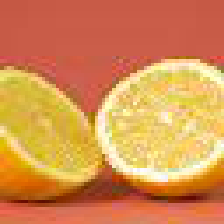

In [80]:
# Display image

lemon_img

In [81]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,consomme,0.227801
2,lemon,0.221758
3,eggnog,0.151335
4,ladle,0.0400883
5,spotlight,0.0291972


##### Image 2: viaduct

In [ ]:
# Display image



In [ ]:
# Display top 5 predictions



##### Image 3: water tower

In [ ]:
# Display image



In [ ]:
# Display top 5 predictions



***
<a id="coding_tutorial_5"></a>
## Tensorflow Hub modules

#### Import and build Tensorflow Hub MobileNet v1 model

Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the [Tensorflow Hub page](https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4) for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Tensorflow SavedModel format. If you want to import it on your personal machine, use the following code:

```python
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
```

In this coding tutorial, you will instead load the model directly from disk.

In [82]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [84]:
# Build Google's Mobilenet v1 model

module = load_model('models/Tensorflow_MobileNet_v1')
model = Sequential(hub.KerasLayer(module))
model.build(input_shape=[None,160,160,3])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


#### Use MobileNet model to classify images

In [85]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("data/lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("data/viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("data/water_tower.jpg", target_size=(160, 160))

In [86]:
# Read in categories text file

with open('data/imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [87]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

##### Image 1: lemon

In [88]:
get_top_5_predictions(lemon_img)

,prediction
1,shower cap
2,tray
3,candle
4,brassiere
5,African chameleon


##### Image 2: viaduct

##### Image 3: water tower